In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
mar20_df = pd.read_csv('202003-citibike-tripdata.csv')
mar20_df.head()

tripduration                 starttime                  stoptime  \
0          1589  2020-03-01 00:00:03.6400  2020-03-01 00:26:32.9860   
1           389  2020-03-01 00:00:16.7560  2020-03-01 00:06:46.0620   
2           614  2020-03-01 00:00:20.0580  2020-03-01 00:10:34.2200   
3           597  2020-03-01 00:00:24.3510  2020-03-01 00:10:22.3390   
4          1920  2020-03-01 00:00:26.1120  2020-03-01 00:32:26.2680   

   start station id        start station name  start station latitude  \
0               224     Spruce St & Nassau St               40.711464   
1               293     Lafayette St & E 8 St               40.730207   
2               379           W 31 St & 7 Ave               40.749156   
3              3739  Perry St & Greenwich Ave               40.735918   
4               236       St Marks Pl & 2 Ave               40.728419   

   start station longitude  end station id             end station name  \
0               -74.005524            3574  Prospect Pl & Underhill Ave   
1               -73.991026             223              W 13 St & 7 Ave   
2               -73.991600             515             W 43 St & 10 Ave   
3               -74.000939             325              E 19 St & 3 Ave   
4               -73.987140            3124                46 Ave & 5 St   

   end station latitude  end station longitude  bikeid    usertype  \
0             40.676969             -73.965790   16214  Subscriber   
1             40.737815             -73.999947   29994  Subscriber   
2             40.760094             -73.994618   39853  Subscriber   
3             40.736245             -73.984738   42608  Subscriber   
4             40.747310             -73.954510   36288  Subscriber   

   birth year  gender  
0        1980       1  
1        1991       2  
2        1991       1  
3        1989       1  
4        1993       1

In [3]:
mar20_df.shape

(1068457, 15)

In [4]:
mar20_df.tail()

tripduration                 starttime                  stoptime  \
1068452           137  2020-03-31 23:56:06.0490  2020-03-31 23:58:23.3880   
1068453          1548  2020-03-31 23:57:27.6850  2020-04-01 00:23:16.4110   
1068454           308  2020-03-31 23:58:00.2690  2020-04-01 00:03:08.9500   
1068455           872  2020-03-31 23:58:42.9010  2020-04-01 00:13:15.5860   
1068456           306  2020-03-31 23:59:17.2580  2020-04-01 00:04:23.8880   

         start station id      start station name  start station latitude  \
1068452               422        W 59 St & 10 Ave               40.770513   
1068453               523         W 38 St & 8 Ave               40.754666   
1068454               528         2 Ave & E 31 St               40.742909   
1068455              3043  Lewis Ave & Decatur St               40.681460   
1068456              3721     31 St & Newtown Ave               40.767549   

         start station longitude  end station id           end station name  \
1068452               -73.988038            3356    Amsterdam Ave & W 66 St   
1068453               -73.991382             442            W 27 St & 7 Ave   
1068454               -73.977061             487        E 20 St & FDR Drive   
1068455               -73.934903            3755  DeKalb Ave & Franklin Ave   
1068456               -73.920933            3592     Crescent St & Broadway   

         end station latitude  end station longitude  bikeid    usertype  \
1068452             40.774667             -73.984706   18851  Subscriber   
1068453             40.746647             -73.993915   36539  Subscriber   
1068454             40.733143             -73.975739   43023  Subscriber   
1068455             40.690648             -73.957462   43073    Customer   
1068456             40.763359             -73.928647   39373  Subscriber   

         birth year  gender  
1068452        1989       2  
1068453        1993       1  
1068454        1982       1  
1068455        1990       1  
1068456        1974       1

In [5]:
mar20_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068457 entries, 0 to 1068456
Data columns (total 15 columns):
tripduration               1068457 non-null int64
starttime                  1068457 non-null object
stoptime                   1068457 non-null object
start station id           1068457 non-null int64
start station name         1068457 non-null object
start station latitude     1068457 non-null float64
start station longitude    1068457 non-null float64
end station id             1068457 non-null int64
end station name           1068457 non-null object
end station latitude       1068457 non-null float64
end station longitude      1068457 non-null float64
bikeid                     1068457 non-null int64
usertype                   1068457 non-null object
birth year                 1068457 non-null int64
gender                     1068457 non-null int64
dtypes: float64(4), int64(6), object(5)
memory usage: 122.3+ MB


In [6]:
from datetime import datetime

In [7]:
mar20_df['year'] = pd.DatetimeIndex(mar20_df['starttime']).year
mar20_df['month'] = pd.DatetimeIndex(mar20_df['starttime']).month
mar20_df['day'] = pd.DatetimeIndex(mar20_df['starttime']).day
mar20_df['hour'] = pd.DatetimeIndex(mar20_df['starttime']).hour
mar20_df['minute'] = pd.DatetimeIndex(mar20_df['starttime']).minute

In [8]:
mar20_df.head()

tripduration                 starttime                  stoptime  \
0          1589  2020-03-01 00:00:03.6400  2020-03-01 00:26:32.9860   
1           389  2020-03-01 00:00:16.7560  2020-03-01 00:06:46.0620   
2           614  2020-03-01 00:00:20.0580  2020-03-01 00:10:34.2200   
3           597  2020-03-01 00:00:24.3510  2020-03-01 00:10:22.3390   
4          1920  2020-03-01 00:00:26.1120  2020-03-01 00:32:26.2680   

   start station id        start station name  start station latitude  \
0               224     Spruce St & Nassau St               40.711464   
1               293     Lafayette St & E 8 St               40.730207   
2               379           W 31 St & 7 Ave               40.749156   
3              3739  Perry St & Greenwich Ave               40.735918   
4               236       St Marks Pl & 2 Ave               40.728419   

   start station longitude  end station id             end station name  \
0               -74.005524            3574  Prospect Pl & Underhill Ave   
1               -73.991026             223              W 13 St & 7 Ave   
2               -73.991600             515             W 43 St & 10 Ave   
3               -74.000939             325              E 19 St & 3 Ave   
4               -73.987140            3124                46 Ave & 5 St   

   end station latitude  end station longitude  bikeid    usertype  \
0             40.676969             -73.965790   16214  Subscriber   
1             40.737815             -73.999947   29994  Subscriber   
2             40.760094             -73.994618   39853  Subscriber   
3             40.736245             -73.984738   42608  Subscriber   
4             40.747310             -73.954510   36288  Subscriber   

   birth year  gender  year  month  day  hour  minute  
0        1980       1  2020      3    1     0       0  
1        1991       2  2020      3    1     0       0  
2        1991       1  2020      3    1     0       0  
3        1989       1  2020      3    1     0       0  
4        1993       1  2020      3    1     0       0

In [9]:
date = mar20_df['day'].values
month = mar20_df['month'].values
year = mar20_df['year'].values
hour = mar20_df['hour'].values
minute = mar20_df['minute'].values
station_start = mar20_df['start station id'].values
station_end = mar20_df['end station id'].values

In [10]:
weekday = np.zeros(len(date))
weekday[:] = np.nan
cnt = 0

for _year, _month, _date, _hour, _minute in zip(year, month, date, hour, minute):
    _dt = datetime(_year, _month, _date, _hour, _minute)
    _weekday = _dt.weekday()
    weekday[cnt] = _weekday
    cnt += 1
    
IsWeekday = weekday < 5
mar20_df['IsWeekday'] = IsWeekday

mar20_df['TimeSlice'] = (hour*3 + np.floor(minute/20)).astype(int)

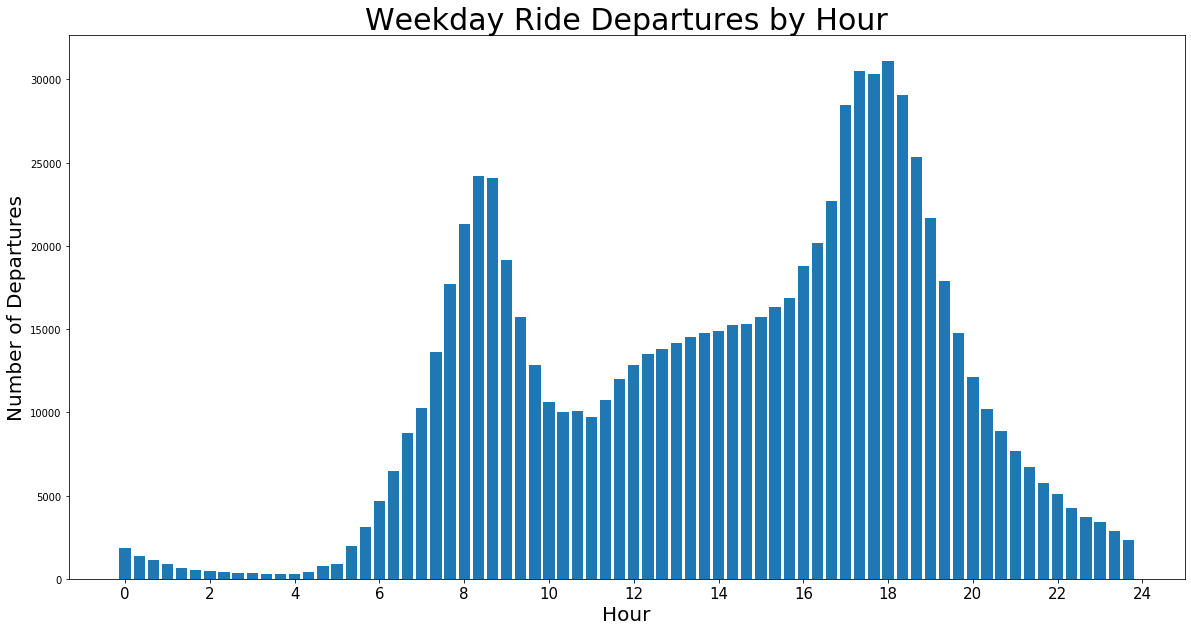

In [11]:
wkday_by_timeslice = mar20_df[mar20_df['IsWeekday']==True].groupby('TimeSlice').count().values[:,0]
plt.figure(figsize=(20,10))
plt.bar(range(0,72), wkday_by_timeslice)
plt.xlabel('Hour',fontsize=20)
plt.xticks(ticks=range(0,78,6),labels=list(range(0,26,2)),fontsize=15)
plt.ylabel('Number of Departures',fontsize=20)
plt.title('Weekday Ride Departures by Hour',fontsize=30)
plt.show()

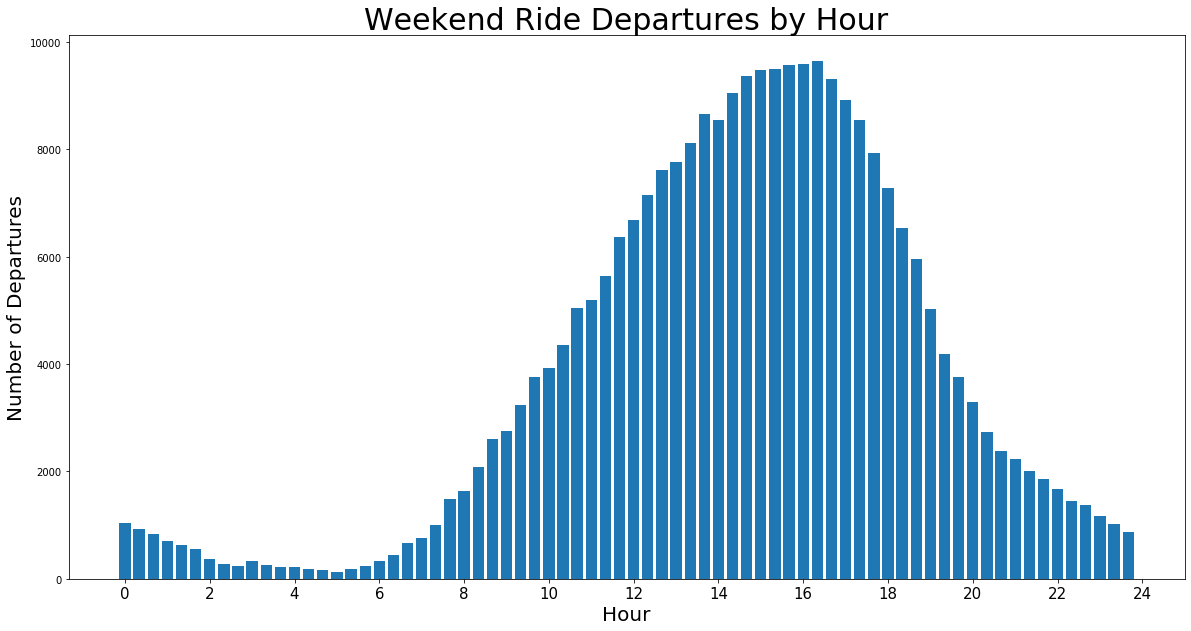

In [12]:
wknd_by_timeslice = mar20_df[mar20_df['IsWeekday']==False].groupby('TimeSlice').count().values[:,0]
plt.figure(figsize=(20,10))
plt.bar(range(0,72), wknd_by_timeslice)
plt.xlabel('Hour',fontsize=20)
plt.xticks(ticks=range(0,78,6),labels=list(range(0,26,2)),fontsize=15)
plt.ylabel('Number of Departures',fontsize=20)
plt.title('Weekend Ride Departures by Hour',fontsize=30)
plt.show()

In [13]:
locations = mar20_df.groupby("start station id").first()
locations = locations.loc[:, ["start station latitude","start station longitude","start station name"]]

In [23]:
def get_trip_counts_by_hour(selected_hour):
    # make a DataFrame with locations for each bike station
    locations = mar20_df.groupby("start station id").first()
    locations = locations.loc[:, ["start station latitude",
                                 "start station longitude",
                                 "start station name"]]
    
    #select one time of day
    subset = mar20_df[mar20_df["hour"]==selected_hour]
    
    # count trips for each destination
    departure_counts =  subset.groupby("start station id").count()
    departure_counts = departure_counts.iloc[:,[0]]
    departure_counts.columns= ["departure count"]
    
    # count trips for each origin
    arrival_counts =  subset.groupby("end station id").count().iloc[:,[0]]
    arrival_counts.columns= ["arrival count"]

    #join departure counts, arrival counts, and locations
    trip_counts = departure_counts.join(locations).join(arrival_counts)
    return trip_counts

# print a sample to check our code works
get_trip_counts_by_hour(8).head()

departure count  start station latitude  \
start station id                                            
72                            248               40.767272   
79                             66               40.719116   
82                             45               40.711174   
83                             32               40.683826   
116                           256               40.741776   

                  start station longitude             start station name  \
start station id                                                           
72                             -73.993929               W 52 St & 11 Ave   
79                             -74.006667       Franklin St & W Broadway   
82                             -74.000165         St James Pl & Pearl St   
83                             -73.976323  Atlantic Ave & Fort Greene Pl   
116                            -74.001497                W 17 St & 8 Ave   

                  arrival count  
start station id                 
72                        187.0  
79                        100.0  
82                         46.0  
83                         72.0  
116                       213.0

In [30]:
import folium
def plot_station_counts(trip_counts):

    NYC = [40.738, -73.98]
    folium_map = folium.Map(location = NYC, zoom_start = 12, tiles = "CartoDB positron")
    
    for index, row in trip_counts.iterrows():
        # calculate net departures
        net_departures = (row["departure count"]-row["arrival count"])
        
        # generate the popup message that is shown on click.
        popup_text = "{}<br> total departures: {}<br> total arrivals: {}<br> net departures: {}"
        popup_text = popup_text.format(row["start station name"],
                          row["departure count"],
                          row["arrival count"],
                          net_departures)
        
        radius = net_departures/25
        if net_departures>0:
            color="#E37222"
        else:          
            color="#0A8A9F"
            
        folium.CircleMarker(location=(row["start station latitude"],row["start station longitude"]),
                            radius=abs(radius),
                            color=color,
                            popup=popup_text,
                            fill=True).add_to(folium_map)
    return folium_map

In [36]:
trip_counts = get_trip_counts_by_hour(8)
map_8am = plot_station_counts(trip_counts)
map_8am.save("map_8am.html")

In [50]:
map_8am

In [37]:
trip_counts = get_trip_counts_by_hour(18)
map_6pm = plot_station_counts(trip_counts)
map_6pm.save("map_6pm.html")

In [51]:
map_6pm

In [46]:
from folium.plugins import MarkerCluster

def plot_cluster_map(trip_counts):

    NYC = [40.738, -73.98]
    folium_map = folium.Map(location = NYC, zoom_start = 12, tiles = "CartoDB positron")
    marker_cluster = MarkerCluster().add_to(folium_map)
    
    for index, row in trip_counts.iterrows():
        # calculate net departures
        net_departures = (row["departure count"]-row["arrival count"])
        
        # generate the popup message that is shown on click.
        popup_text = "{}<br> total departures: {}<br> total arrivals: {}<br> net departures: {}"
        popup_text = popup_text.format(row["start station name"],
                          row["departure count"],
                          row["arrival count"],
                          net_departures)
        
        radius = net_departures/25
        if net_departures>0:
            color="#E37222"
        else:          
            color="#0A8A9F"
            
        folium.CircleMarker(location=(row["start station latitude"],row["start station longitude"]),
                            radius=abs(radius),
                            color=color,
                            popup=popup_text,
                            fill=True).add_to(marker_cluster)
    return folium_map

In [48]:
trip_counts = get_trip_counts_by_hour(8)
map_8am_cluster = plot_cluster_map(trip_counts)
map_8am_cluster.save("clustermap_8am.html")
map_8am_cluster

In [49]:
trip_counts = get_trip_counts_by_hour(18)
map_6pm_cluster = plot_cluster_map(trip_counts)
map_6pm_cluster.save("clustermap_6pm.html")
map_6pm_cluster